# WeRateDogs Twitter Data Wrangling

## Table of Contents
- [Gathering Data](#gather)
- [Assessing Data](#assess)
- [Cleaning Data](#clean)
- [Storing, Analyzing, and Visualizing Data](#visual)

<a id='gather'></a>
# Gathering Data

In [1]:
#import packages
import requests
import pandas as pd
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#download file image-predictions.tsv from url
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url)
open('image-predictions.tsv', 'wb').write(r.content)

335079

In [3]:
#read twitter-archive-enhanced.csv file
df_enhanced=pd.read_csv('twitter-archive-enhanced.csv')

#read image-predictions.tsv file
df_image=pd.read_csv('image-predictions.tsv',sep='\t')

- Below Twitter API code is copied from given file twitter-api.py due to no access right on twitter developer account.

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

KeyboardInterrupt: 

- tweet-json.txt: given file with the resulting data from twitter-api.py.

In [5]:
#read given file tweet-json.txt line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count. 
with open('tweet-json.txt') as file:
    json_list = []
    for line in file:
        json_list.append(json.loads(line))
        
api_list = []
for tweet in json_list:
    tweet_id = tweet['id']
    retweet_count = tweet['retweet_count']
    favorite_count = tweet['favorite_count']
    api_list.append({'tweet_id': tweet_id,
                     'retweet_count': retweet_count, 
                     'favorite_count': favorite_count})
df_api = pd.DataFrame(api_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_api = df_api.sort_values('tweet_id').reset_index(drop=True)

<a id='assess'></a>
# Assessing Data

In [6]:
#view records of table df_enhanced
pd.set_option('max_colwidth',None)
df_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [7]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
#records with reply or retweet
df_enhanced[(df_enhanced.retweeted_status_id.notnull()) | (df_enhanced.in_reply_to_status_id.notnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",13,10,Lilly,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tessa. She is also very pleased after finally meeting her biological father. 10/10 https://t.co/qDS1aCqppv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438988365824/photo/1,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>","RT @dogratingrating: Exceptional talent. Original humor. Cutting edge, Nova Scotian comedian. 12/10 https://t.co/uarnTjBeVA",6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,"https://twitter.com/dogratingrating/status/667548695664070656/photo/1,https://twitter.com/dogratingrating/status/667548695664070656/photo/1",12,10,None,None,None,None,None
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",RT @dogratingrating: Unoriginal idea. Blatant plagiarism. Curious grammar. -5/10 https://t.co/r7XzeQZWzb,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,"https://twitter.com/dogratingrating/sta

In [9]:
df_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#check the records for low rating_denominator
df_enhanced[df_enhanced.rating_denominator<10][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
2335,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,1,2


In [11]:
#some records with wrong rating_numerator
df_enhanced[df_enhanced.rating_numerator==75][['text','rating_numerator']]

,text,rating_numerator
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75


In [12]:
#missing value and invalid name in name column
df_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
             ... 
officially      1
Marvin          1
Pherb           1
Spark           1
Coleman         1
Name: name, Length: 957, dtype: int64

In [13]:
#name with lower case
df_enhanced[df_enhanced.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
getting          2
not              2
actually         2
mad              2
old              1
light            1
this             1
incredibly       1
my               1
life             1
his              1
by               1
infuriating      1
such             1
space            1
officially       1
all              1
unacceptable     1
Name: name, dtype: int64

In [14]:
#None value instead of NaN, and only one category besides None
df_enhanced.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
#None value instead of NaN, and only one category besides None
df_enhanced.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
#None value instead of NaN, and only one category besides None
df_enhanced.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
#None value instead of NaN, and only one category besides None
df_enhanced.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [18]:
#multiple dog stages in records
df_enhanced[(df_enhanced['doggo']=='doggo') & ((df_enhanced['floofer']!='None') | (df_enhanced['pupper']!='None') | (df_enhanced['puppo']!='None'))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377

In [19]:
#view records of table df_image
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
df_image.p1.value_counts()

golden_retriever       150
Labrador_retriever     100
Pembroke                89
Chihuahua               83
pug                     57
                      ... 
lion                     1
soccer_ball              1
clumber                  1
black-footed_ferret      1
American_black_bear      1
Name: p1, Length: 378, dtype: int64

In [23]:
df_image.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
sliding_door            1
Kerry_blue_terrier      1
tarantula               1
streetcar               1
torch                   1
Name: p2, Length: 405, dtype: int64

In [24]:
df_image.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
go-kart                1
Kerry_blue_terrier     1
whiptail               1
grey_fox               1
jeep                   1
Name: p3, Length: 408, dtype: int64

In [25]:
#view records of table df_image
df_api

,tweet_id,retweet_count,favorite_count
0,666020888022790149,532,2535
1,666029285002620928,48,132
2,666033412701032449,47,128
3,666044226329800704,147,311
4,666049248165822465,41,111
...,...,...,...
2349,891327558926688256,9774,41048
2350,891689557279858688,8964,42908
2351,891815181378084864,4328,25461
2352,892177421306343426,6514,33819


In [26]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [27]:
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Quality
##### `df_enhanced` table
- Erroneous datatypes (timestamp columns)
- Retweets and replies included (redundant records)
- Drop unuseful columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- Incorrect rating_denominator
  - tweet_id:666287406224695296(2->10)
- Incorrect rating_numerator
  - tweet_id:666287406224695296(1->9)
  - Float number was recognized as integer
- There are 745 None values under name column, and the names with lowercase are invalid names.
- doggo, floofer, pupper, puppo columns contain 'None' value which is not counted as null
- There are records with more than one stages (doggo with one of the floofer, pupper, puppo columns)
    - tweet_id:855851453814013952
    - 854010172552949760
    - 817777686764523521
    - 808106460588765185
    - 802265048156610565
    - 801115127852503040
    - 785639753186217984
    - 781308096455073793
    - 759793422261743616
    - 751583847268179968
    - 741067306818797568
    - 733109485275860992
    - 775898661951791106
    - 770093767776997377
- Calculate rating with values of rating_numerator divided by rating_deniminator

##### `df_image` table
- Sometimes lowercase and sometimes uppercase for breed names in p1, p2, p3 columns


#### Tidiness
- doggo, floofer, pupper, puppo columns should be combined in one column with category data type in the `df_enhanced` table
- Merge datasets to one

<a id='clean'></a>
# Cleaning Data

In [28]:
#make copy of tables for cleaning
df_enhanced_clean=df_enhanced.copy()
df_image_clean=df_image.copy()
df_api_clean=df_api.copy()

### Quality

- **Erroneous datatypes (timestamp column)**

**Define**
- Change datatype to datetime for timestamp column

**Code**

In [29]:
#change data type to datetime
df_enhanced_clean.timestamp = pd.to_datetime(df_enhanced_clean.timestamp)

**Test**

In [30]:
#confirm data type changed to datetime
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

- **Retweets and replies included (redundant records)**

**Define**
- Remove the records which columns "in_reply_to_status_id" or "retweeted_status_id" is not null

**Code**

In [31]:
#filter out records which columns "in_reply_to_status_id" or "retweeted_status_id" is not null
df_enhanced_clean = df_enhanced_clean[~((df_enhanced_clean['in_reply_to_status_id'].notnull()) | (df_enhanced_clean['retweeted_status_id'].notnull()))]

**Test**

In [32]:
#confirm records removed
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

In [33]:
#no records for retweet or reply
df_enhanced_clean[(df_enhanced_clean['in_reply_to_status_id'].notnull()) | (df_enhanced_clean['retweeted_status_id'].notnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


- **Drop unuseful columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**

**Define**
- Drop columns which will not be used: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

**Code**

In [34]:
#drop the columns which will not be used
list_col=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
df_enhanced_clean.drop(list_col,axis=1,inplace=True)

**Test**

In [35]:
#confirm columns dropped
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

- **Incorrect rating_denominator**
  - tweet_id:666287406224695296(2->10)

**Define**
- replace 2 with 10 for rating denominator for tweet_id:666287406224695296

**Code**

In [36]:
#replace with 10 for the incorrect rating denominator
df_enhanced_clean.loc[df_enhanced_clean['tweet_id'] == 666287406224695296, 'rating_denominator'] = 10

**Test**

In [37]:
#confirm rating denominator corrected
df_enhanced_clean[(df_enhanced_clean['tweet_id']==666287406224695296)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,10,an,None,None,None,None


- **Incorrect rating_numerator**
  - tweet_id:666287406224695296(1->9)
  - Float number was recognized as integer.

**Define**
- replace 1 with 9 for rating numerator for tweet_id:666287406224695296
- extract float number from text column and store in column rating_numerator
- change datatype to float

**Code**

In [38]:
#replace with 9 for the incorrect rating numerator
df_enhanced_clean.loc[df_enhanced_clean['tweet_id'] == 666287406224695296, 'rating_numerator'] = 9

In [39]:
#extract float number and store in column rating_numerator
for row in df_enhanced_clean.itertuples():
    match=re.findall("\d+\.\d+/", row.text)
    if match:
        df_enhanced_clean.loc[row.Index,'rating_numerator']=match[0][:-1]

In [40]:
#change data type for column rating_numerator to float
df_enhanced_clean.rating_numerator=df_enhanced_clean.rating_numerator.astype('float')

**Test**

In [41]:
#confirm rating numerator corrected
df_enhanced_clean[(df_enhanced_clean['tweet_id']==666287406224695296)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,2015-11-16 16:11:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,9.0,10,an,None,None,None,None


In [42]:
#confirm float number stored in column
df_enhanced_clean.rating_numerator.value_counts()

12.00      486
10.00      436
11.00      413
13.00      287
9.00       154
8.00        98
7.00        52
14.00       38
5.00        33
6.00        32
3.00        19
4.00        16
2.00         9
1.00         4
13.50        1
0.00         1
24.00        1
84.00        1
420.00       1
1776.00      1
80.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
11.27        1
121.00       1
9.75         1
99.00        1
204.00       1
45.00        1
165.00       1
50.00        1
Name: rating_numerator, dtype: int64

In [43]:
#confirm column data type
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

- **There are 745 None values under name column, and the names with lowercase are invalid names.**

**Define**

- Change None values and names with lowercase to null.
- Extract name from text column by using keywords.

**Code**

In [44]:
#replace with null values for name under lowercase
df_enhanced_clean.name.replace(df_enhanced_clean[df_enhanced_clean.name.str.islower()].name,np.nan,inplace=True)

#replace with null values for name under None value
df_enhanced_clean.name.replace('None',np.nan,inplace=True)

In [45]:
# extract name from text column by using keywords
df_enhanced_clean['name'] = df_enhanced_clean.text.str.extract(r'(?:his is|Meet|Say hello to|Here is|named|name is|Here we have)\s([A-Z][^\s.,]*)',expand=True)

**Test**

In [46]:
#confirm the null values under name column
df_enhanced_clean[df_enhanced_clean.name.notnull()].name.count()

1424

In [47]:
#confirm name under lowercase not exists
df_enhanced_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Howard', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles',
       'Jack', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
       'Je

- **doggo, floofer, pupper, puppo columns contain 'None' value which is not counted as null**

**Define**

- Replace None with NaN for columns doggo, floofer, pupper, puppo

**Code**

In [48]:
#replace none to NaN
df_enhanced_clean.doggo.replace('None',np.nan,inplace=True)
df_enhanced_clean.floofer.replace('None',np.nan,inplace=True)
df_enhanced_clean.pupper.replace('None',np.nan,inplace=True)
df_enhanced_clean.puppo.replace('None',np.nan,inplace=True)

**Test**

In [49]:
#confirm the null values exist
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   int64              
 7   name                1424 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              230 non-null    object             
 11  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), float64

In [50]:
#confirm no none values
print(df_enhanced_clean.doggo.value_counts())
print(df_enhanced_clean.floofer.value_counts())
print(df_enhanced_clean.pupper.value_counts())
print(df_enhanced_clean.puppo.value_counts())

doggo    83
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    230
Name: pupper, dtype: int64
puppo    24
Name: puppo, dtype: int64


- **There are records with more than one stages (doggo with one of the floofer, pupper, puppo columns)**
    - tweet_id:855851453814013952
    - 854010172552949760
    - 817777686764523521
    - 808106460588765185
    - 802265048156610565
    - 801115127852503040
    - 785639753186217984
    - 781308096455073793
    - 759793422261743616
    - 751583847268179968
    - 741067306818797568
    - 733109485275860992
    - 775898661951791106
    - 770093767776997377

**Define**

- Records with tweet_id 775898661951791106 and 770093767776997377 were removed due to records of retweet or reply.
- Remove records of ratings for two dogs with tweet_id: 808106460588765185, 781308096455073793, 759793422261743616, 741067306818797568, 733109485275860992
- Remove records not related to dog with tweet_id: 785639753186217984
- Correct the dog stage for the wrong classification with tweet_id(doggo->nan): 855851453814013952, 854010172552949760, 817777686764523521, 801115127852503040
- Correct the dog stage for the wrong classification with tweet_id(pupper->nan): 
751583847268179968

**Code**

In [51]:
#series for the tweet ids which needs to be removed
id_remove=pd.Series([808106460588765185, 781308096455073793, 759793422261743616, 741067306818797568, 733109485275860992,785639753186217984])
#remove records with above tweet ids
df_enhanced_clean=df_enhanced_clean[~df_enhanced_clean.tweet_id.isin(id_remove) ]

#series for the tweet ids which needs to be corrected
id_change=pd.Series([855851453814013952, 854010172552949760, 817777686764523521, 801115127852503040])
#correct the dog stage for the records with above tweet ids
df_enhanced_clean.doggo.replace(df_enhanced_clean[df_enhanced_clean.tweet_id.isin(id_change)].doggo,np.nan,inplace=True)

#correct the dog stage for the records with tweet id 751583847268179968
df_enhanced_clean.loc[df_enhanced_clean.tweet_id==751583847268179968,'pupper']=np.nan


**Test**

In [52]:
#confirm the df info after modification
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2091 non-null   int64              
 1   timestamp           2091 non-null   datetime64[ns, UTC]
 2   source              2091 non-null   object             
 3   text                2091 non-null   object             
 4   expanded_urls       2088 non-null   object             
 5   rating_numerator    2091 non-null   float64            
 6   rating_denominator  2091 non-null   int64              
 7   name                1421 non-null   object             
 8   doggo               73 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              223 non-null    object             
 11  puppo               24 non-null     object             
dtypes: datetime64[ns, UTC](1), float64

In [53]:
#confirm no multiple dog stages records
df_enhanced_clean[(df_enhanced_clean['doggo']=='doggo') & ((df_enhanced_clean['floofer'].notnull()) | (df_enhanced_clean['pupper'].notnull()) | (df_enhanced_clean['puppo'].notnull()))]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


- **Calculate rating with values of rating_numerator divided by rating_denominator**

**Define**

- Create new column rating: rating_numerator/rating_denominator

**Code**

In [54]:
#calculate rating column by rating_numerator/rating_denominator
df_enhanced_clean['rating']=df_enhanced_clean['rating_numerator']/df_enhanced_clean['rating_denominator']

**Test**

In [55]:
#confirm new column created
df_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN,NaN,NaN,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,NaN,NaN,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,NaN,NaN,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN,NaN,NaN,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,NaN,NaN,NaN,1.2


In [56]:
#confirm new column info
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2091 non-null   int64              
 1   timestamp           2091 non-null   datetime64[ns, UTC]
 2   source              2091 non-null   object             
 3   text                2091 non-null   object             
 4   expanded_urls       2088 non-null   object             
 5   rating_numerator    2091 non-null   float64            
 6   rating_denominator  2091 non-null   int64              
 7   name                1421 non-null   object             
 8   doggo               73 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              223 non-null    object             
 11  puppo               24 non-null     object             
 12  rating              2091 non-null 

- **Sometimes lowercase and sometimes uppercase for breed names in p1, p2, p3 columns**

**Define**

- Capitalize first letter for p1,p2,p3 columns

**Code**

In [57]:
#change first letter to capital letter
df_image_clean.p1=df_image_clean.p1.str.capitalize()
df_image_clean.p2=df_image_clean.p2.str.capitalize()
df_image_clean.p3=df_image_clean.p3.str.capitalize()

**Test**

In [58]:
#confirm values updated
df_image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


### Tidiness

- **doggo, floofer, pupper, puppo columns should be combined in one column with category data type in the `df_enhanced` table**

**Define**

- Join the four dog stage columns doggo,floofer,pupper,puppo into one
- Drop the four dog stage columns after combined
- Change datatype to category

**Code**

In [59]:
df_enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda x: ','.join(x.dropna().astype('category')),axis=1)

0        
1        
2        
3        
4        
       ..
2351     
2352     
2353     
2354     
2355     
Length: 2091, dtype: object

In [60]:
#create column dog_stage to combine columns doggo,floofer,pupper,puppo, and set datatype to category
df_enhanced_clean['dog_stage'] = df_enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(
    lambda x: ','.join(x.dropna().astype('category')),axis=1)

#replace with null values
df_enhanced_clean.replace('',np.nan,inplace=True)

#drop the four columns after combined
df_enhanced_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

**Test**

In [61]:
#check columns combined
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2091 non-null   int64              
 1   timestamp           2091 non-null   datetime64[ns, UTC]
 2   source              2091 non-null   object             
 3   text                2091 non-null   object             
 4   expanded_urls       2088 non-null   object             
 5   rating_numerator    2091 non-null   float64            
 6   rating_denominator  2091 non-null   int64              
 7   name                1421 non-null   object             
 8   rating              2091 non-null   float64            
 9   dog_stage           330 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(5)
memory usage: 259.7+ KB


In [62]:
df_enhanced_clean.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

- **Merge datasets to one**

**Define**

- Merge three datasets to one on tweet_id

**Code**

In [63]:
#merge datasets into one on tweet_id
from functools import reduce
df_clean=reduce(lambda x,y: pd.merge(x,y, on='tweet_id'), [df_enhanced_clean, df_image_clean, df_api_clean])

**Test**

In [64]:
#confirm newly created dataframe
df_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,1.3,NaN,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,1.3,NaN,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,1.2,NaN,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,1.3,NaN,...,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,1.2,NaN,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,NaN,0.5,NaN,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,41,111
1962,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,NaN,0.6,NaN,...,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True,147,311
1963,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,NaN,0.9,NaN,...,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,47,128
1964,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western b

In [65]:
#confirm newly created dataframe info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1966 entries, 0 to 1965
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1966 non-null   int64              
 1   timestamp           1966 non-null   datetime64[ns, UTC]
 2   source              1966 non-null   object             
 3   text                1966 non-null   object             
 4   expanded_urls       1966 non-null   object             
 5   rating_numerator    1966 non-null   float64            
 6   rating_denominator  1966 non-null   int64              
 7   name                1379 non-null   object             
 8   rating              1966 non-null   float64            
 9   dog_stage           298 non-null    object             
 10  jpg_url             1966 non-null   object             
 11  img_num             1966 non-null   int64              
 12  p1                  1966 non-null 

In [66]:
df_clean.describe()

,tweet_id,rating_numerator,rating_denominator,rating,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.966000e+03,1966.000000,1966.000000,1966.000000,1966.000000,1966.000000,1.966000e+03,1.966000e+03,1966.000000,1966.000000
mean,7.359668e+17,12.184527,10.482706,1.165290,1.201933,0.593944,1.347438e-01,6.023040e-02,2777.085453,8931.165819
std,6.758285e+16,41.659400,6.859288,4.093021,0.559367,0.271991,1.010191e-01,5.093360e-02,4691.650871,12256.833911
min,6.660209e+17,0.000000,7.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.758475e+17,10.000000,10.000000,1.000000,1.000000,0.362857,5.387868e-02,1.619283e-02,627.250000,1982.000000
50%,7.087246e+17,11.000000,10.000000,1.100000,1.000000,0.587440,1.174550e-01,4.947920e-02,1363.000000,4136.000000
75%,7.881228e+17,12.000000,10.000000,1.200000,1.000000,0.846896,1.955693e-01,9.155482e-02,3235.250000,11406.750000
max,8.924206e+17,1776.000000,170.000000,177.600000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


<a id='visual'></a>
# Storing, Analyzing, and Visualizing Data

- Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv.
- Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. 
- At least three (3) insights and one (1) visualization must be produced.

In [67]:
#save clean dataframe to csv file
df_clean.to_csv('twitter_archive_master.csv', index=False)

In this section I will answer the following questions:
- The highest rated dog
- The dog with highest retweet counts
- The dog with highest favorite counts
- What are most popular 10 dogs' names?
- What is the most common dog stage? Is there any difference on rating, retweet counts, favorite counts between dog stages?
- Is there any impact on retweet and favorite counts based on ratings?
- What is the percentage the algorithm can predict a dog breed?

**The highest rated dog**

In [68]:
#the record of highest rated dog
highest_rating=df_clean['rating'].max()
df_clean[df_clean['rating']==highest_rating]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
719,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10,Atticus,177.6,NaN,...,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,2772,5569


**Answer:** The highest rated dog rated at rating of 177.6, whose name is Atticus.

**The dog with highest retweet counts**

In [69]:
#the record of highest retweeted dog
highest_retweet=df_clean['retweet_count'].max()
df_clean[df_clean['retweet_count']==highest_retweet]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
766,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10,NaN,1.3,doggo,...,0.825333,True,Ice_bear,0.044681,False,Whippet,0.018442,True,79515,131075


**Answer:** The highest retweeted dog has been retweeted for 79,515 times.

**The dog with highest favorite counts**

In [70]:
#the record with highest favorite counts
highest_favorite=df_clean['favorite_count'].max()
df_clean[df_clean['favorite_count']==highest_favorite]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,dog_stage,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
306,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10,NaN,1.3,puppo,...,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,48265,132810


**Answer:** There are favorite counts of 132,810 times for the dog with highest favorite counts.

**What are most popular 10 dogs' names?**

In [71]:
#most popular 10 names
pop_name_10=df_clean.name.value_counts()[:10]
pop_name_10

Charlie    11
Lucy       10
Cooper     10
Oliver     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Lola        7
Toby        7
Name: name, dtype: int64

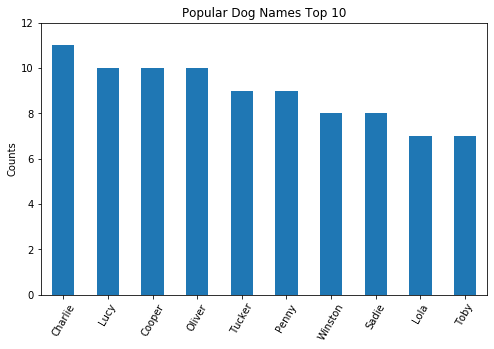

In [72]:
#bar plot for the top 10 names
pop_name_10.plot(kind='bar',figsize=(8,5));
plt.ylim([0,12]);
plt.title('Popular Dog Names Top 10');
plt.ylabel('Counts');
plt.xticks(rotation=60);

**Answer:** The most popular names top 10 are: Charlie, Cooper, Lucy, Oliver, Penny, Tucker, Winston, Sadie, Lola and Toby.

**What is the most common dog stage? Is there any difference on rating, retweet counts, favorite counts between dog stages?**

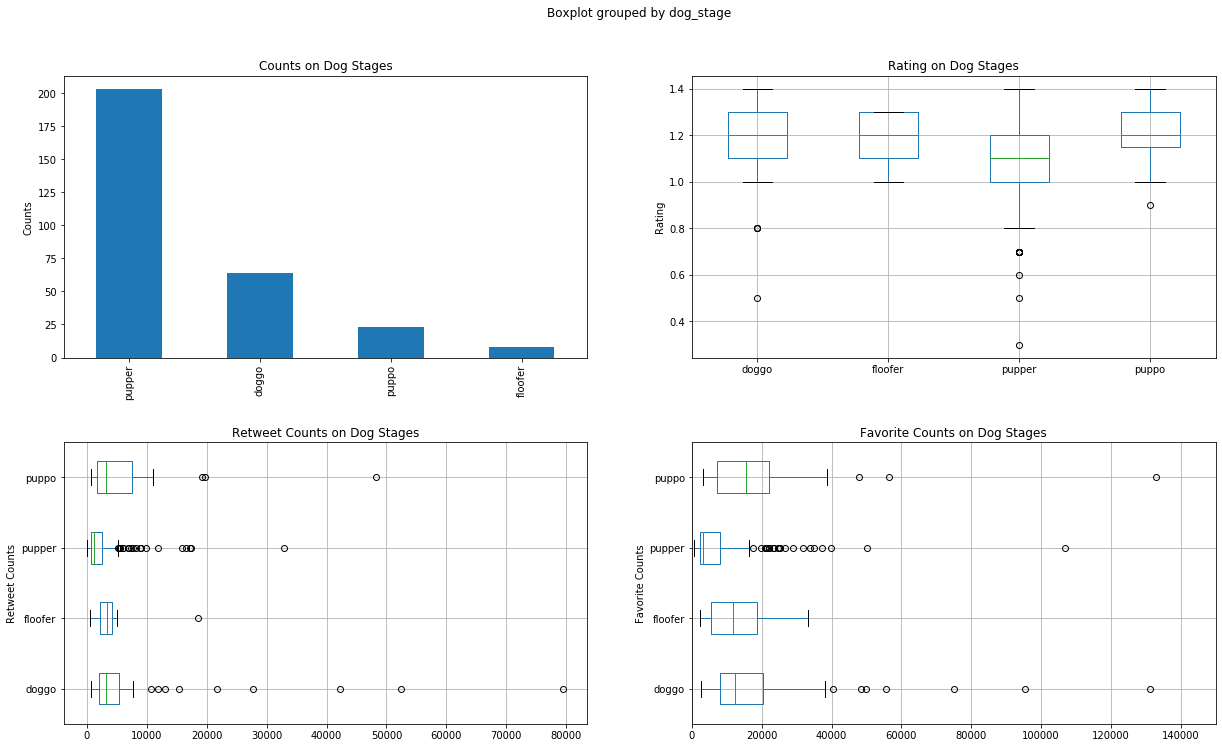

In [73]:
#adjust figure size and space between plots
fig = plt.figure(figsize=(20, 12));
plt.subplots_adjust(wspace=0.3,hspace=0.3);

#plot bar chart of number of dog stages
ax1 = fig.add_subplot(2, 2, 1);
df_clean.dog_stage.value_counts().plot(ax=ax1,kind='bar');
plt.title('Counts on Dog Stages');
plt.ylabel('Counts');

#plot bar chart of rating on dog stages
ax2 = fig.add_subplot(2, 2, 2);
df_clean.boxplot("rating", by="dog_stage",ax=ax2);
plt.title('Rating on Dog Stages');
plt.ylabel('Rating');
plt.xlabel('');

#plot bar chart of retweet counts on dog stages
ax3 = fig.add_subplot(2, 2, 3)
df_clean.boxplot("retweet_count", by="dog_stage",ax=ax3,vert=False);
plt.title('Retweet Counts on Dog Stages');
plt.ylabel('Retweet Counts');
plt.xlabel('');

#plot bar chart of favorite counts on dog stages
ax4 = fig.add_subplot(2, 2, 4);
df_clean.boxplot("favorite_count", by="dog_stage",ax=ax4,vert=False);
plt.xlim([0,150000]);
plt.title('Favorite Counts on Dog Stages');
plt.ylabel('Favorite Counts');
plt.xlabel('');

**Answer:**
   
    - Pupper is the most common dog stage. However, for rating, retweet counts, and favorite counts, pupper is the lowest among all of the four dog stages.
    - The median of rating, retweet counts, and favorite counts for other three dog stages are almost the same.
    - For retweet and favorite counts, there are outliers for doggo with higher counts.

**Is there any impact on retweet and favorite counts based on ratings?**

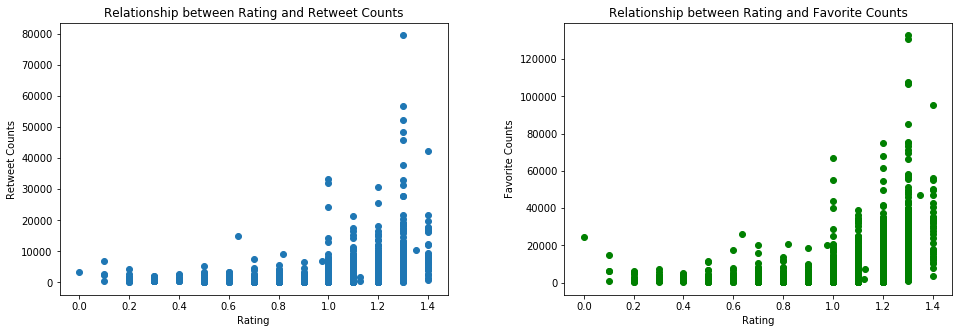

In [74]:
#remove outliers: filter out the rating less than 2 
df_rating_2=df_clean[df_clean.rating<=2]
#adjust figure size and space between plots
fig = plt.figure(figsize=(16, 5))
plt.subplots_adjust(wspace=0.3)

#plot scatter chart to view the relationship between rating and retweet counts
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(df_rating_2.rating,df_rating_2.retweet_count);
plt.title('Relationship between Rating and Retweet Counts');
plt.xlabel('Rating');
plt.ylabel('Retweet Counts');


#plot scatter chart to view the relationship between rating and favorite counts
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(df_rating_2.rating,df_rating_2.favorite_count,color='g');
plt.title('Relationship between Rating and Favorite Counts');
plt.xlabel('Rating');
plt.ylabel('Favorite Counts');

**Answer:** Both plots show that higher the rating is, the number of retweet or favorite is higher, which implies that rating has impact on the retweet and favorite counts.

**What is the percentage the algorithm can predict a dog breed?**

In [75]:
#predict a dog breed for the first trial
p1_percent=df_clean.p1_dog.mean()
p1_percent

0.742115971515768

In [76]:
#predict a dog breed before the second trial
p2_percent=((df_clean.p1_dog==True) | (df_clean.p2_dog==True)).mean()
p2_percent

0.814852492370295

In [77]:
#predict a dog breed before the third trial
p3_percent=((df_clean.p1_dog==True) | (df_clean.p2_dog==True) | (df_clean.p3_dog==True)).mean()
p3_percent

0.8453713123092573

(0, 1)

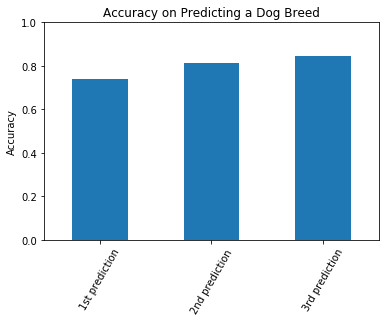

In [78]:
#plot bar chart on accuracy on prediction of dog breed
pd.Series([p1_percent,p2_percent,p3_percent]).plot(kind='bar',figsize=(6,4));
plt.xticks([0, 1, 2],['1st prediction','2nd prediction','3rd prediction'],rotation=60);
plt.title('Accuracy on Predicting a Dog Breed');
plt.ylabel('Accuracy');
plt.ylim([0,1])

**Answer:** 

    - The accuracy of first prediction on successful predicting a dog breed is about 75%.
    - The accuracy of second prediction is increased by about 7%, while the increase for accuracy of the third prediction is getting lower at 3%.
    - The accuracy of the algorithm for predicting a dog breed is around 85% total.